# Tasks for laboratory assignment 1

## Extract webpage data given the url

Create a Python script that performs basic web scraping on a page to extract all the information into text and returns it as a string.
String should not contain tags.

In [5]:
import requests
from bs4 import BeautifulSoup


def parse_web_page(url: str) -> str:
    response = requests.get(url)
    response.raise_for_status()
    return BeautifulSoup(response.text).get_text().strip()

print(parse_web_page('https://fmi.chnu.edu.ua/')[:255])
print(parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255])

Головна - Факультет математики та інформатики




















































Перейти до основного вмісту






[email protected]



                58012, Україна, м. Чернівці, вул. Університетська, 28
            


















Web scraping - Wikipedia



























Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate





		Contribute
	


HelpLearn to ed


## Get data from the API

Create a python script that performs basic request to API endpoint and saves that data to a JSON file `result.json`.

In [9]:
import json


def parse_api(api_url: str) -> None:
    response = requests.get(api_url)
    response.raise_for_status()
    with open("resources/result.json", "w") as file:
        json.dump(response.json(), file, indent=3)

parse_api('https://api.github.com/')

## Parse the json file

Parse the `weather.json` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [18]:
import datetime


def parse_json(date: str) -> list:
    datetime.date.fromisoformat(date) # Date validation
    data = {}
    with open("resources/weather.json") as file:
        data = json.load(file)
    
    for weather in data.get("daily", []):
        if weather.get("date", "") == date:
            return list(weather.values())
    return []
    
target_date = '2024-08-19'
print(parse_json(target_date))

['2024-08-19', 30.0, 21.0, 5.0, 10.0, 70, 'Light rain']


## Parse the csv file

Parse the `weather.csv` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [49]:
import pandas as pd


def parse_csv(date: str) -> list:
    # datetime.date.fromisoformat(date) # Date validation 
    # Commented because df has bad date format

    df = pd.read_csv("resources/weather.csv", dtype={"CET": str})
    mask = df[df["CET"] == date]
    if not mask.empty:
        return mask.values.tolist()[0]
    return []

    
target_date = "1997-5-22"
print(parse_csv(target_date))

['1997-5-22', 25.0, 18.0, 10.0, 11.0, 8.0, 6.0, 88.0, 54.0, 34.0, 1017, 1015, 1012, 10.0, 10.0, 10.0, 11, 3, nan, 0.0, 3.0, nan, 277]


## Visualize data

Visualize the `weather.csv` data using matplotlib. Choose your own approach to data visualization. Save the results (as `.png`, `.webp` files etc., your choise) in this repository. 

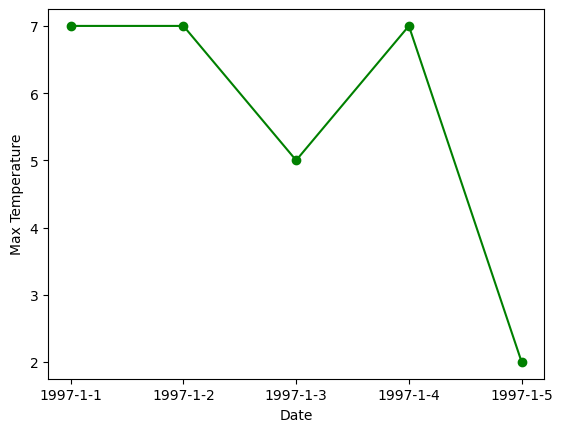

In [59]:
import matplotlib.pyplot as plt


def visualize_data() -> None:
    df = pd.read_csv(
        "resources/weather.csv",
        dtype={"CET": str},
        usecols=["CET", "Max TemperatureC"],
        nrows=5, # Reduce memory, because it's just example
    )
    plt.plot(
        df["CET"],
        df["Max TemperatureC"],
        marker="o",
        color="green"
    )
    plt.xlabel("Date")
    plt.ylabel("Max Temperature")
    plt.savefig("resources/max_temp.webp")
    plt.show()

visualize_data()